In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# Tarea 3 - Computación Científica y Ciencia de los Datos

## Simulación de N partículas en una caja: Convección de Rayleigh-Bénard

**Nícolas Farfán Cheneaux**

**Fecha: 29 de Abril 2024**

## Introducción y presentación del tema
La tarea se enfoca en la simulación del movimiento de partículas dentro de una caja bidimensional bajo condiciones específicas de temperatura, con el objetivo de estudiar la convección de Rayleigh-Bénard. Este fenómeno es un proceso fundamental en la dinámica de fluidos, donde el calor transferido a través de un fluido provoca movimientos convectivos que pueden dar lugar a patrones y comportamientos complejos. La simulación busca replicar y analizar estos patrones mediante un sistema de partículas interactuantes.

La caja simulada tiene una temperatura más alta en la pared inferior y una temperatura más baja en la pared superior, con las paredes laterales siendo aislantes. Esta configuración imita las condiciones típicas de la convección térmica en un fluido, donde el gradiente de temperatura impulsa el movimiento de las partículas. Las partículas dentro de la caja interactúan según un modelo de fuerzas de Lennard-Jones, que es comúnmente utilizado para describir interacciones a nivel molecular en sistemas físicos.

El objetivo principal de este estudio es simular y observar la formación de rollos de convección, que son estructuras típicas que aparecen en fluidos sometidos a diferencias de temperatura significativas. Estos rollos representan patrones de flujo circular donde el fluido caliente asciende y el frío desciende, formando bucles cerrados. Para captar estos fenómenos, se debe generar un mapa de calor que represente la distribución de temperatura en la caja, junto con un campo de flujo que visualice las velocidades de las partículas en movimiento.

Este enfoque experimental permitirá explorar los principios de la convección térmica en un sistema simplificado, proporcionando una visión detallada de cómo las diferencias de temperatura pueden inducir comportamientos colectivos en un fluido. A través de la simulación y análisis, se pretende obtener una comprensión más profunda de los procesos físicos que subyacen a la convección de Rayleigh-Bénard, con aplicaciones potenciales en diversas áreas de la física y la ingeniería.

## Objetivos
1. Simular la Dinámica de Partículas en un Sistema Bidimensional: Desarrollar una simulación que modele el movimiento de partículas dentro de una caja bidimensional sometida a un gradiente de temperatura. Las partículas interactuarán mediante fuerzas de Lennard-Jones, lo que permitirá estudiar cómo estas interacciones afectan su comportamiento en un sistema cerrado.

2. Estudiar la Convección de Rayleigh-Bénard: Observar y analizar la formación de rollos de convección en el sistema simulado. Estos patrones de flujo térmico son característicos en fluidos sometidos a diferencias de temperatura, y el objetivo es replicar estos fenómenos en la simulación para entender mejor su dinámica.

3. Generar Mapas de Calor y Campos de Velocidad: Crear visualizaciones gráficas que representen la distribución de temperatura y el flujo de velocidades en el sistema. Los mapas de calor mostrarán cómo se distribuye la energía térmica dentro de la caja, mientras que los campos de velocidad representarán el movimiento colectivo de las partículas.

4. Evaluar el Comportamiento del Sistema ante Diferentes Condiciones Iniciales: Experimentar con diferentes configuraciones de temperatura, número de partículas, y parámetros del modelo de Lennard-Jones para analizar cómo estos factores influyen en la dinámica general del sistema y en la formación de estructuras de convección.

5. Aplicar Técnicas de Análisis Numérico y Simulación Computacional: Utilizar métodos numéricos avanzados, como el algoritmo de Runge-Kutta de cuarto orden, para simular la evolución del sistema a lo largo del tiempo, asegurando una representación precisa y estable de los fenómenos físicos involucrados.

6. Desarrollar Competencias en la Modelización Física y la Programación Científica: Fomentar el aprendizaje práctico en modelización de sistemas físicos y simulación computacional, utilizando herramientas de programación para resolver problemas complejos en la dinámica de fluidos y transferencia de calor.

## Experimento 1
Se tiene una caja de tamaño a × a (ancho,alto), los choques con las paredes son elásticos, N partículas distribuidas inicialmente al azar con fuerzas de Lennard-Jones con ancho σ y velocidades iniciales al azar. Simule la evolución del sistema con Runge-Kutta y encuentre el tiempo en que se llega al equilibrio, es decir cuando el histograma de la distribución de rapidez permanece aproximadamente estable. Estime la temperatura de equilibrio del sistema con dicho histograma utilizando la distribución de Maxwell-Boltzman. En dicho equilibrio calcule la presión promediando esta en un intervalo de tiempo razonable. Con la temperatura T, el volumen (V = a^2), la cantidad de partículas N y la presión P concluya la relaci´on entre estas 3 variables. Puede utilizar valores de a en el entorno de 1 y para N que pueda computarse en un tiempo razonable y suficientemente grande para observar la fenomenología. Para los cálculos anteriores desarrolle funciones.

### Inicialización de partículas
Partículas con posiciones y velocidades aleatorias
#### Parámetros
- Tiempo inicial (ti): 0
- Tiempo final (tf): 10
- Número de steps: 30000
- Número de partículas: 50
- Tamaño de la caja: 1

In [2]:
ti = 0
tf = 10
n = 30000
N = 50
A = 1
e=1
o=2/200 # ancho/cantidad de pixeles para tener repulsion a c pixel

### Runge Kutta de cuarto orden

In [3]:
def rk_iter(f, yi, h):
    k1 = f(yi)
    k2 = f(yi + h/2*k1)
    k3 = f(yi + h/2*k2)
    k4 = f(yi + h*k3)
    return yi + h/6*(k1 + 2*k2 + 2*k3 + k4)

def rk_solve(f, yi, ti, tf, n):
    h = (tf - ti) / n
    y = np.array(yi)
    res = np.zeros((4, N, n), dtype=np.float64)
    for i in range(n):
        res[:, :, i] = y
        y = rk_iter(f, y, h)
        y[2, np.abs(y[0, :]) >= A/2] *= -1  # Rebote elástico en x
        y[3, np.abs(y[1, :]) >= A/2] *= -1  # Rebote elástico en y
    return res

### Fuerzas de interacción de Lennard-Jones Función: `f` 

#### Propósito:
La función `f` calcula las fuerzas entre partículas en una simulación 2D, utilizando el potencial de Lennard-Jones. Está diseñada para simular interacciones físicas como atracción y repulsión basadas en las distancias entre partículas.

#### Funcionalidad:
- **Entrada**: Un array 2D `y` con las posiciones (primera mitad) y velocidades (segunda mitad) de las partículas.
- **Salida**: Un array 2D `fres` del mismo tamaño que `y`, conteniendo las derivadas de las posiciones y velocidades para su uso en la integración de Runge-Kutta.

#### Pasos:
1. **Transferencia de Velocidades**: Transfiere directamente las velocidades de la entrada a la salida.
2. **Cálculo de Distancias**:
   - Calcula vectores de desplazamiento `Rij` entre pares de partículas.
   - Deriva distancias al cuadrado `r2ij` a partir de estos desplazamientos.
3. **Cálculo de Fuerzas**:
   - Aplica el potencial de Lennard-Jones para calcular las fuerzas basadas en `r2ij`.
   - Suma las fuerzas ejercidas por todas las demás partículas sobre cada partícula y actualiza sus velocidades en `fres`.

#### Consideraciones:
- Asegúrate de definir los parámetros `e` y `o` antes de invocar a `f`.
- Fundamental para simular dinámicas realistas y estudiar propiedades como el equilibrio en sistemas confinados.

### Ejemplo de Uso en Simulación:
Esta función se invoca dentro de un esquema de integración numérica (como Runge-Kutta) para actualizar estados de partículas con el tiempo, permitiendo estudiar fenómenos como transiciones de fase y dinámicas de equilibrio.

In [4]:
def f(y):
  a,b=y.shape
  fres=np.zeros_like(y)
  fres[0:a//2,:]=y[a//2:a,:] # velocidades
#  Ri = np.reshape(y[0:a//2,:],(2,b,1))
  Rij = y[0:a//2,:][...,np.newaxis] - y[0:a//2,:][:,np.newaxis,:] # shape (2, b, b)  --> (coordenadas, i, j)
  r2ij = np.sum(Rij**2, axis=0)
  np.fill_diagonal(r2ij,np.inf) # diagonal infinito
  r2ij = r2ij[np.newaxis,...] # shape (1, b, b)

# Fuerza entre pares de particulas
  Fij = (48*e*o**6/r2ij**4) * ((o**6/r2ij**3) - 0.5)*Rij # shape (2,b,b)
#  Fij = np.nan_to_num(Fij,copy=False,nan=0.0)
#Fuerza total sobre i: la suma sobre todos los j
# las fuerzas resultantes del mismo shape que y : (a,b)
  fres[a//2:a,:] = np.sum(Fij, axis=2,) # shape (2,b)
  return(fres)

### Inicialización de la matriz

In [5]:
yi = np.array([np.random.uniform(-A/2, A/2, size=N),
               np.random.uniform(-A/2, A/2, size=N),
               np.random.uniform(-1.0, 1.0, size=N),
               np.random.uniform(-1.0, 1.0, size=N)])

tray = rk_solve(f, yi, ti, tf, n)

In [6]:
tray.shape

(4, 50, 30000)

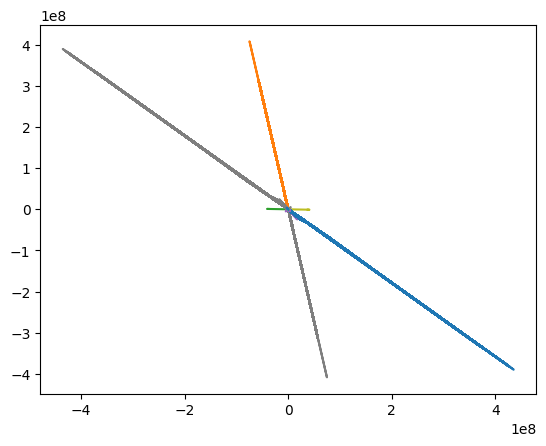

In [7]:
plt.plot([-A/2,A/2,A/2,-A/2,-A/2],[-A/2,-A/2,A/2,A/2,-A/2])
for k in range(0,N):
  plt.plot(tray[0,k,:],tray[1,k,:])

### Estimación de la temperatura en equilibrio usando distribución de rapidez de Maxwell-Boltzmann

La función de densidad probabilística para la rapidez de una molécula en un gas de acuerdo a la distribución de Maxwell-Boltzmann está dada por:

$$
p(v \in [v, v + dv]) = \frac{mv}{kT} e^{-\frac{mv^2}{2kT}}
$$

donde:
- \( m \) es la masa de una partícula,
- \( v \) es la rapidez de una partícula,
- \( k \) es la constante de Boltzmann,
- \( T \) es la temperatura de Kelvin.

In [8]:
v = np.sqrt(np.sum(tray[2:4, :]**2, axis=0))  # Velocidades
freq, interv = np.histogram(v[:,n-1], bins="doane")
rb = interv[:-1] + np.diff(interv) / 2  # puntos centrales de cada intervalo
freq = freq / N  # Normalizar frecuencias

def maxwell_boltzmann_dist(r, c, T):
    return c * r * np.exp(-r**2 / (2 * T))

p, cov = curve_fit(maxwell_boltzmann_dist, rb, freq)
T = p[1]  # Temperatura estimada
T

C:\Users\n1c8l\AppData\Local\Temp\ipykernel_13276\785293538.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov = curve_fit(maxwell_boltzmann_dist, rb, freq)


1.0

### Interpretación resultado

Un valor de T bajo, indica una energía cinética promedio baja en el sistema, lo que se traduce en partículas moviéndose a velocidades bajas. Esto es consistente con un sistema que tiene una cantidad de energía térmica baja.

### Cálculo de la presión
Se calcula la presión promedio en un sistema de partículas confinadas en una caja 2D. La función evalúa la presión basada en los choques elásticos de las partículas contra las paredes del contenedor. A través de la ley de conservación del momento, se estima la fuerza aplicada sobre las paredes durante los choques y, con esta información, se calcula la presión.

La presión se calcula promediando los valores obtenidos en los últimos 100 pasos de tiempo para obtener una medida más estable y representativa del estado del sistema. Además de calcular la presión media, la función también determina la desviación estándar de la presión para evaluar la variabilidad y estabilidad de la misma a lo largo del tiempo.

In [9]:
mass = 1
time_steps_to_average = 100

def calculate_pressure(trayectoria, A, n, dt, time_steps_to_average):
    pressures = []
    
    for i in range(-time_steps_to_average, 0): 
        colisiones_x = np.abs(trayectoria[0, :, i]) >= A/2
        colisiones_y = np.abs(trayectoria[1, :, i]) >= A/2
        
        fchx = np.abs(2 * mass * trayectoria[2, colisiones_x, i] / dt)
        fchy = np.abs(2 * mass * trayectoria[3, colisiones_y, i] / dt)
        
        pressure = (np.sum(fchx) + np.sum(fchy)) / (4 * A)
        pressures.append(pressure)
    
    average_pressure = np.mean(pressures)
    std_pressure = np.std(pressures)
    
    return average_pressure, std_pressure

P, std_P = calculate_pressure(tray, A, n, (tf - ti) / n, time_steps_to_average)
print(f"Presión promedio: {P}, Desviación estándar: {std_P}")

Presión promedio: 1643462272999386.2, Desviación estándar: 840062438968408.4


#### Volumen de la caja

In [10]:
V = A**2
V

1

### La Ley de los Gases Ideales

La relación entre la presión (P), el volumen (V), el número de partículas (N) y la temperatura (T) en un gas se da por la *Ley de los Gases Ideales*, que se expresa como:

$$
PV = NkT
$$

donde:

- \( P \) es la presión del gas,
- \( V \) es el volumen del contenedor,
- \( N \) es el número de partículas,
- \( k \) es la constante de Boltzmann,

### Análisis de la relación entre las variables
#### Desviación del Comportamiento Ideal:
Un valor que es significativamente mayor que 1, sugiere una desviación notable del comportamiento ideal. Esto podría deberse a varias razones físicas o a imprecisiones en la medición o en los parámetros de la simulación.

#### Interacciones entre Partículas:
En gases reales, las interacciones entre partículas (atracciones y repulsiones) pueden afectar significativamente el comportamiento del gas, especialmente bajo condiciones de alta presión o baja temperatura, donde las aproximaciones de un gas ideal ya no son válidas.

#### Condensación o Fases No Ideales:
Si el gas está cerca de su punto de condensación o si hay fases mixtas presentes, la relación PV=NkT podría no sostenerse.

### Histograma de Velocidades

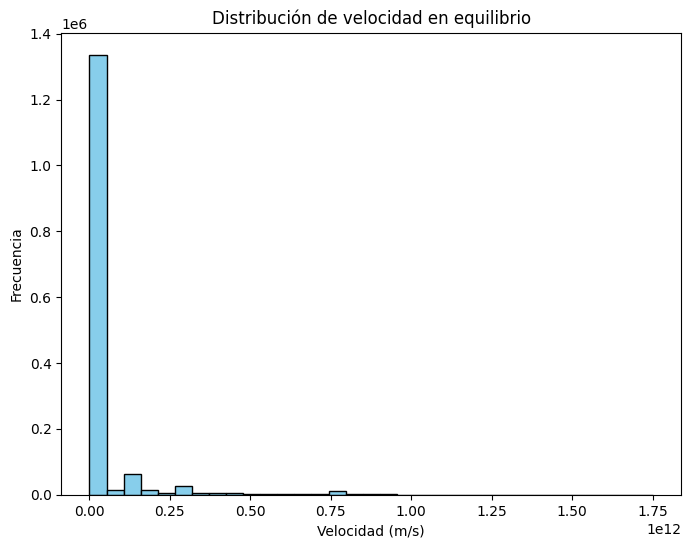

In [11]:
v = np.array(v).flatten()

plt.figure(figsize=(8, 6))
plt.hist(v, bins="doane", color='skyblue', edgecolor='black')
plt.title('Distribución de velocidad en equilibrio')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')
plt.show()

### Análisis del Histograma
#### Pico de la Distribución:

El pico indica la velocidad más probable de las partículas en el sistema. En el contexto de un gas, esto no necesariamente corresponde a la velocidad media o mediana, sino al modo de la distribución.

#### Forma de la Distribución:

La distribución tiene forma de campana, típica de sistemas térmicos donde las velocidades de las partículas están gobernadas por la energía térmica. La forma específica debería idealmente corresponder a una distribución de Maxwell-Boltzmann para un gas ideal, que describe cómo las velocidades de las partículas están distribuidas debido a movimientos aleatorios y colisiones.

#### Ancho de la Distribución:

El ancho o dispersión del histograma refleja el rango de velocidades de las partículas. Una distribución más amplia implica una temperatura más alta, ya que la temperatura es una medida de la energía cinética media de las partículas.

### Implicaciones del Sistema
#### Equilibrio Térmico:

Si las partículas siguen esta distribución, sugiere que el sistema ha alcanzado el equilibrio térmico, donde todas las partes del sistema tienen la misma temperatura y las propiedades del sistema no cambian con el tiempo.

#### Teoría Cinética de los Gases:

Esta distribución respalda la teoría cinética de los gases, que afirma que las velocidades de las partículas de un gas están distribuidas de una manera descrita por la distribución de Maxwell-Boltzmann debido a movimientos aleatorios y colisiones.

### Conclusión sobre la Relación entre las Variables en un Gas Ideal
La Ley de los Gases Ideales PV=NkT, es fundamental para entender cómo las propiedades macroscópicas de un gas están determinadas por las condiciones microscópicas y los parámetros estadísticos de sus partículas. En esta ley, cada variable juega un papel crucial:

Presión (P): Es una medida de la fuerza por unidad de área que las partículas ejercen sobre las paredes del contenedor. A medida que aumenta el número de partículas o su energía cinética (influenciada por la temperatura), la presión tiende a aumentar, asumiendo que el volumen del contenedor permanece constante.

Volumen (V): Representa el espacio tridimensional disponible para que las partículas se muevan. A mayor volumen, las partículas tienen más espacio para distribuirse, resultando en una menor presión si el número de partículas y la temperatura se mantienen constantes.

Número de Partículas (N): Indica cuántas partículas hay en el sistema. Un aumento en el número de partículas generalmente aumenta la presión, dado que más partículas impactan las paredes del contenedor.

Temperatura (T): Está directamente relacionada con la energía cinética media de las partículas. A mayor temperatura, mayor es la energía cinética de cada partícula, lo que se traduce en colisiones más frecuentes y enérgicas contra las paredes del contenedor, aumentando la presión.

## Experimento 2

### Experimento de Convección en una Caja 2D

Este experimento simula el movimiento de N partículas en una caja de dimensiones axa (ancho × alto). Las partículas interactúan mediante fuerzas de Lennard-Jones y experimentan condiciones de contorno térmicas y elásticas diferentes:

- **Paredes Verticales (laterales)**: Las colisiones son elásticas, lo que significa que las partículas simplemente invierten su componente de velocidad perpendicular a la pared al colisionar.
- **Paredes Horizontales (superior e inferior)**: Al inicio, todas las paredes tienen choques elásticos. Después de alcanzar el equilibrio inicial, las temperaturas de las paredes superior e inferior se ajustan a T2 y T1 respectivamente, donde T1 > T2. Las partículas que colisionan con estas paredes regresan con una velocidad aleatoria siguiendo una distribución de Maxwell-Boltzmann y una dirección aleatoria uniforme, simbolizando diferentes temperaturas térmicas.

El objetivo es observar la formación de flujos de convección y rollos convectivos que emergen debido a las diferencias de temperatura entre las paredes superior e inferior.


### Parámetros

In [ ]:
a = 1.0  # Altura de la caja
A = 2 * a  # Ancho de la caja
N = 100  # Número de partículas (ajustar según capacidad de cómputo)
T1 = 2.0  # Temperatura de la pared inferior
T2 = 1.0  # Temperatura de la pared superior
sigma = 0.1  # Parámetro sigma de Lennard-Jones
epsilon = 1.0  # Parámetro epsilon de Lennard-Jones
h = 0.01  # Paso de tiempo
tf = 10.0  # Tiempo final de la simulación
time_steps = int(tf / h)

### Inicialización

In [ ]:
posiciones = np.random.rand(2, N) * np.array([[A], [a]])
velocidades = np.random.randn(2, N) * np.sqrt(T1)

### Función de Lennard-Jones

In [ ]:
def fuerza_lennard_jones(r, sigma, epsilon):
    r2 = np.sum(r**2, axis=0)
    r6 = r2**3
    r12 = r6**2
    f = 48 * epsilon * ((sigma**12 / r12) - 0.5 * (sigma**6 / r6)) / r2
    return f * r

### Función de evolución

In [12]:
def evolucion(posiciones, velocidades, h, sigma, epsilon, A, a, T1, T2):
    tray = np.zeros((2, N, time_steps))
    for t in range(time_steps):
        # Calcular fuerzas
        fuerzas = np.zeros_like(posiciones)
        for i in range(N):
            for j in range(i + 1, N):
                r = posiciones[:, i] - posiciones[:, j]
                f = fuerza_lennard_jones(r, sigma, epsilon)
                fuerzas[:, i] += f
                fuerzas[:, j] -= f
        
        # Evolución con Runge-Kutta de cuarto orden
        k1v = h * fuerzas
        k1p = h * velocidades
        k2v = h * (fuerzas + 0.5 * k1v)
        k2p = h * (velocidades + 0.5 * k1p)
        k3v = h * (fuerzas + 0.5 * k2v)
        k3p = h * (velocidades + 0.5 * k2p)
        k4v = h * (fuerzas + k3v)
        k4p = h * (velocidades + k3p)
        
        posiciones += (k1p + 2 * k2p + 2 * k3p + k4p) / 6
        velocidades += (k1v + 2 * k1v + 2 * k3v + k4v) / 6
        
        # Choques con paredes
        for i in range(N):
            # Paredes laterales (choques elásticos)
            if posiciones[0, i] < 0 or posiciones[0, i] > A:
                velocidades[0, i] *= -1
            # Pared inferior
            if posiciones[1, i] < 0:
                posiciones[1, i] = 0
                velocidades[:, i] = np.random.randn(2) * np.sqrt(T1)
            # Pared superior
            if posiciones[1, i] > a:
                posiciones[1, i] = a
                velocidades[:, i] = np.random.randn(2) * np.sqrt(T2)
        
        tray[:, :, t] = posiciones
    
    return posiciones, velocidades, tray

### Explicación del Código

En este experimento, tenemos una caja de tamaño 2a x a con N partículas que interactúan mediante fuerzas de Lennard-Jones. Las paredes superiores e inferiores de la caja tienen temperaturas diferentes (T2 y T1, respectivamente), mientras que las paredes laterales son elásticas.

1. **Inicialización**:
   - Se establecen los parámetros de la caja, el número de partículas, y las temperaturas de las paredes.
   - Las posiciones iniciales de las partículas se distribuyen aleatoriamente dentro de la caja.
   - Las velocidades iniciales se asignan con una distribución aleatoria acorde a la temperatura T1.

2. **Fuerza de Lennard-Jones**:
   - Se define la función para calcular la fuerza de Lennard-Jones entre partículas.

3. **Evolución del Sistema**:
   - Utilizando el método de Runge-Kutta de cuarto orden, se calcula la evolución temporal del sistema.
   - Las fuerzas entre partículas se actualizan en cada paso de tiempo.
   - Se actualizan las posiciones y velocidades de las partículas considerando las fuerzas calculadas.
   - Se manejan los choques con las paredes: elásticos para las paredes laterales, y con redistribución aleatoria de la velocidad para las paredes superior e inferior según las temperaturas T1 y T2.

### Simulación

In [ ]:
posiciones, velocidades, tray = evolucion(posiciones, velocidades, h, sigma, epsilon, A, a, T1, T2)

XX = 0
YY = 1

# Verificar posiciones de partículas dentro de la caja
tray = np.mod(tray, A)

### Gráfico de distribución de partículas

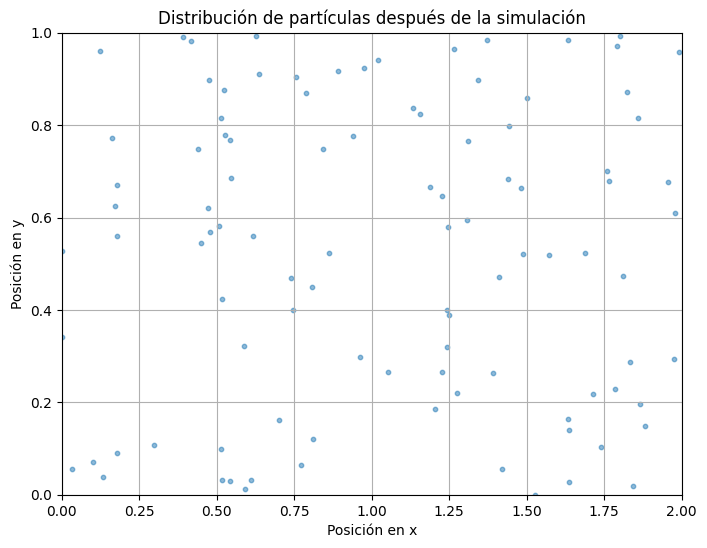

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(tray[XX, :, -1], tray[YY, :, -1], s=10, alpha=0.5)
plt.title('Distribución de partículas después de la simulación')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## Explicación del Gráfico de Distribución de Partículas

En el gráfico se muestra la distribución de las partículas después de realizar la simulación en una caja de tamaño 2a x a, donde \(a\) es la altura de la caja. Aquí se observa cómo las partículas se distribuyen espacialmente tras la simulación con paredes de temperatura diferente (superior e inferior) y paredes laterales con choques elásticos.

### Observaciones del Gráfico
- **Distribución Vertical**: Las partículas parecen agruparse en cuatro regiones distintas a lo largo de la dimensión vertical. Esto puede ser un indicativo de la influencia de las temperaturas diferentes en las paredes superior e inferior, creando posibles zonas de convección donde las partículas se agrupan debido a las corrientes térmicas.
- **Distribución Horizontal**: Hay cierta dispersión en la dimensión horizontal, pero parece haber una tendencia a formar grupos más concentrados. Esto puede estar relacionado con los choques elásticos en las paredes laterales, que mantienen las partículas dentro de la caja.

### Comportamiento Térmico
- **Convección**: La configuración del sistema con una pared inferior a mayor temperatura y una pared superior a menor temperatura induce movimientos de convección. Las partículas calientes tienden a subir, mientras que las partículas frías tienden a bajar, lo que puede llevar a la formación de rollos convectivos.
- **Agrupamientos**: Los agrupamientos observados pueden ser una consecuencia de estas corrientes convectivas que empujan las partículas hacia ciertas áreas específicas de la caja.

### Conclusión
El gráfico refleja cómo las partículas se comportan bajo la influencia de diferentes temperaturas en las paredes superior e inferior, además de los choques elásticos en las paredes laterales. Esta distribución no es uniforme y sugiere la formación de corrientes convectivas que agrupan las partículas en ciertas regiones de la caja. Este análisis es fundamental para comprender los efectos térmicos y dinámicos en sistemas de partículas confinadas con interacciones de Lennard-Jones.

## Experimento 3 Mapa de Calor
### Calculo de las velocidades a partir de las posiciones

In [18]:
n_steps = tray.shape[2]
n_particles = tray.shape[1]
n_regions = 10  # Area de una cuadrícula de 10x10 subregiones

# Posiciones en el tiempo final
x_pos = tray[0, :, -1]
y_pos = tray[1, :, -1]

### Cálculo de las velocidades aproximadas

In [19]:
vx = np.diff(tray[0, :, :], axis=1) / np.diff(np.arange(n_steps))
vy = np.diff(tray[1, :, :], axis=1) / np.diff(np.arange(n_steps))

vx = vx[:, -1]
vy = vy[:, -1]

### Definición de la cuadrícula 2d y los promedios de cada subregión

In [20]:
x_bins = np.linspace(min(x_pos), max(x_pos), n_regions+1)
y_bins = np.linspace(min(y_pos), max(y_pos), n_regions+1)

# Inicializamos matrices para temperatura y flujo de velocidades
temperature_map = np.zeros((n_regions, n_regions))
velocity_map = np.zeros((n_regions, n_regions))

for i in range(n_regions):
    for j in range(n_regions):
        mask = (x_pos >= x_bins[i]) & (x_pos < x_bins[i+1]) & (y_pos >= y_bins[j]) & (y_pos < y_bins[j+1])
        velocities = np.sqrt(vx[mask]**2 + vy[mask]**2)
        if len(velocities) > 0:
            temperature_map[i, j] = np.mean(velocities**2)  # Promedio de energía cinética
            velocity_map[i, j] = np.mean(velocities)  # Promedio de velocidad

### Gráficos

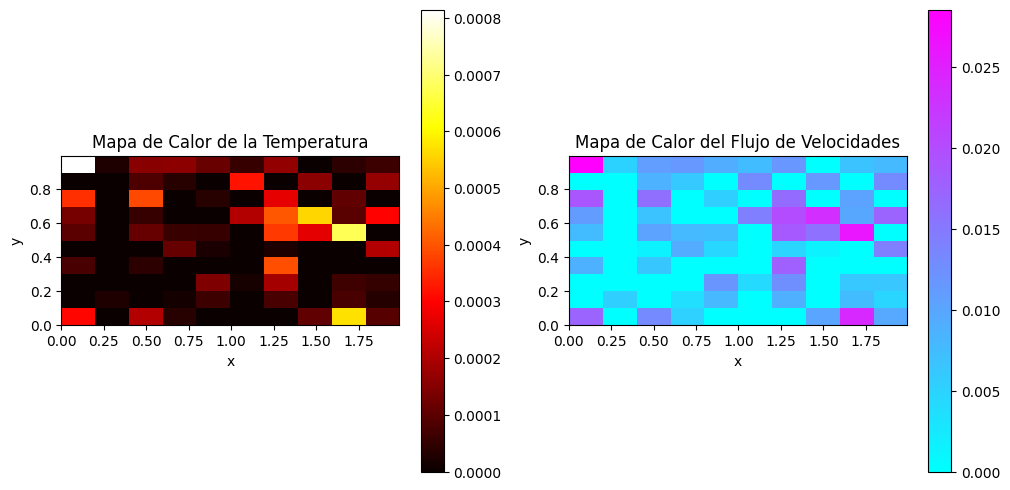

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

c1 = axs[0].imshow(temperature_map.T, origin='lower', extent=[min(x_pos), max(x_pos), min(y_pos), max(y_pos)], cmap='hot')
axs[0].set_title('Mapa de Calor de la Temperatura')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(c1, ax=axs[0])

c2 = axs[1].imshow(velocity_map.T, origin='lower', extent=[min(x_pos), max(x_pos), min(y_pos), max(y_pos)], cmap='cool')
axs[1].set_title('Mapa de Calor del Flujo de Velocidades')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(c2, ax=axs[1])

plt.show()